<a href="https://colab.research.google.com/github/abais-hub/CMPE258_project/blob/main/CMPE258_Assignment_4_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 258 Assignment 4 Part 2
# Abhishek Bais
## Tasks : Use Keras
a) Mini batch gradient descent along with appropriate learning rate.  
b) Dropout, initialize the random weights of network properly.  
c) Basic image augmentations to supplement the training data.  
d) Should use  3 or more layers for training (not 2 as in example ).  
e) Should use relu activation layer in right places like python code.  
f) Should normalize the input before training (scaling the input).  
g) Should use appropriate learning rate.  
h) Should provide appropriate metrics, visualization.    
i) Should display top common errors like in below link.  


# Load MNIST Dataset 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
from sklearn.metrics import mean_squared_error
import itertools
import math
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Read in the Mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Visualize the dataset

In [ ]:
# View the data
def visualize_N_elems_of_dataset(dataset, N, name):
  print("Visualizing the " + name + " dataset.")
  fig = plt.figure(figsize=plt.figaspect(0.3))

  # Plot N elems of the dataset
  for image in range(0, N):
    ax = fig.add_subplot(1, 10, image+1)
    ax.imshow(dataset[image], cmap='Accent')

Visualizing the train dataset.


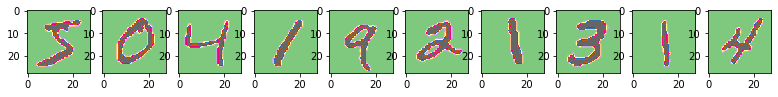

In [ ]:
N = 10
visualize_N_elems_of_dataset(X_train, N, "train")

Visualizing the test dataset.


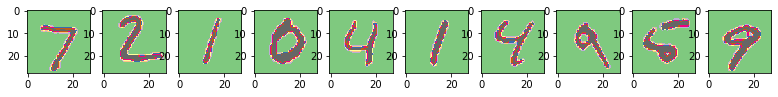

In [ ]:
N = 10
visualize_N_elems_of_dataset(X_test, N, "test")

# Reference used for underneath code
https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6

# Read in the mnist dataset, normalize, encode

In [ ]:
# Read in the mnist dataset, normalize, encode
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# normalize
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)

# encode
X_train, X_valid = np.expand_dims(X_train, axis=-1), np.expand_dims(X_valid, axis=-1)
y_train, y_valid, true_valid = to_categorical(y_train, num_classes=10), to_categorical(y_valid, num_classes=10), y_valid

# print
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(54000, 28, 28, 1)
(10000, 28, 28)
(54000, 10)
(10000,)


# Build the NueralNet

In [ ]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Flatten, Conv2D, MaxPool2D
from keras_preprocessing.image import ImageDataGenerator
from keras.layers.core import Reshape

In [ ]:
# Explore building NueralNet with CNN
def build_nueralNet():
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=(5, 5), padding="Same", activation="relu", input_shape=(28, 28, 1)))
  model.add(Conv2D(filters=32, kernel_size=(5, 5), padding="Same", activation="relu"))
  model.add(MaxPool2D((2, 2)))
  model.add(Dropout(0.5))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="Same", activation="relu"))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="Same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(256, activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation="softmax"))
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')
  print(model.summary())
  return model


In [ ]:
# Build the NueralNet without CNN, only relu, softmax
def build_nueralNet():
  model = Sequential()
  model.add(Reshape((-1,), input_shape = (28, 28, 1)))
  model.add(Dense(28 * 28, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')
  print(model.summary())
  return model


In [ ]:
model = build_nueralNet()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

# Define the hyperparameters

In [ ]:
num_epochs = 10
batch_size = 32

# Define adaptive learning rate, with patience=5

In [ ]:
# Use adaptive learning rate
from keras.callbacks import ReduceLROnPlateau
adaptive_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                                patience=5, 
                                verbose=1, 
                                factor=0.5, 
                                min_lr=0.00001)

# Augment images

In [ ]:
gen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

gen.fit(X_train)

# Fit, predict with augmentation, adaptive learning rate

In [ ]:
# fit predict
history = model.fit(gen.flow(X_train, y_train, batch_size=batch_size), 
                    steps_per_epoch=math.floor(X_train.shape[0] / batch_size), 
                    epochs=num_epochs, callbacks=[adaptive_lr], 
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1687/1687 [==============================] - 381s 225ms/step - loss: 3.0095 - accuracy: 0.3590 - val_loss: 0.1954 - val_accuracy: 0.9533
Epoch 2/10
1687/1687 [==============================] - 381s 226ms/step - loss: 0.5228 - accuracy: 0.8347 - val_loss: 0.1254 - val_accuracy: 0.9650
Epoch 3/10
1687/1687 [==============================] - 385s 228ms/step - loss: 0.3409 - accuracy: 0.8948 - val_loss: 0.1098 - val_accuracy: 0.9707
Epoch 4/10
1687/1687 [==============================] - 386s 229ms/step - loss: 0.2651 - accuracy: 0.9198 - val_loss: 0.0789 - val_accuracy: 0.9757
Epoch 5/10
1687/1687 [==============================] - 385s 228ms/step - loss: 0.2273 - accuracy: 0.9296 - val_loss: 0.0639 - val_accuracy: 0.9797
Epoch 6/10
1687/1687 [==============================] - 386s 229ms/step - loss: 0.2004 - accuracy: 0.9423 - val_loss: 0.0562 - val_accuracy: 0.9828
Epoch 7/10
1687/1687 [==============================] - 388s 230ms/step - loss: 0.1811 - accuracy: 0.9453 - val_

# Visualize accuracy of prediction

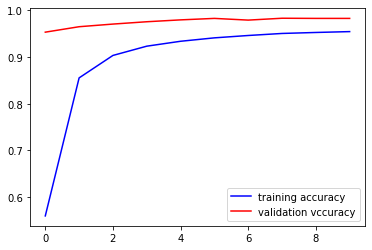

In [ ]:
# Plot the accuracy metrics
plt.plot(history.history["accuracy"], 'b', label="training accuracy")
plt.plot(history.history["val_accuracy"], 'r', label="validation vccuracy")
plt.legend(loc="best")
plt.show()

# Plot the confusion matrix

In [ ]:
# visualize accuracy on confusion matrix
def plot_confusion_matrix(y_true, y_pred):
  c_matrix = confusion_matrix(y_true, y_pred) 
  plt.imshow(c_matrix, cmap='Accent')
  
  for i, j in itertools.product(
      range(c_matrix.shape[0]), range(c_matrix.shape[1])):
      plt.text(j, i
               , c_matrix[i, j]
               , horizontalalignment="center"
               , color="white" if c_matrix[i, j] > (c_matrix.max() / 2.) else "black")

  plt.title('Confusion matrix plot')
  plt.ylabel('True labels')
  plt.xlabel('Predicted labels')


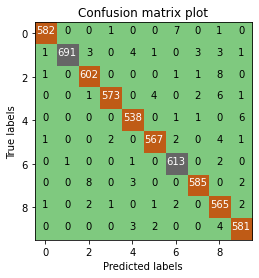

In [ ]:
pred_valid = np.argmax(model.predict(X_valid), axis=1) 
plot_confusion_matrix(true_valid, pred_valid)